In [3]:
import os
import csv 
import pandas as pd
import librosa
import numpy as np

pathname=[]
filename=[]
mfccsfeatures = []
foldername = []
for root, dirs, files in os.walk(r"C:\Users\Chandhinii.B\Desktop\Electrical engineering course\Winter semester 2022\Ferdinand steinbeis institute\AI\Dataset"): 
    for fname in files:
        if fname.endswith('.wav'):
            path = os.path.join(root, fname)
            pathname.append(path)
            audio, sample_rate = librosa.load(path)
            mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
            mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
            mfccsfeatures.append(mfccs_scaled_features)
for i in pathname:
    Name = os.path.basename(i)
    filename.append(Name) 
    folder = i.split(os.path.sep)[-3]
    foldername.append(folder)
columns=['Pathname', 'Filename','MFCCfeatures','Foldername']            
df = pd.DataFrame(list(zip(pathname, filename,mfccsfeatures,foldername)),
                 columns=columns)

df.loc[(df['Filename'].str.contains("_niO_")) & (df['Foldername'].str.contains("hydr")), "Class"]="leak present under hydr environment"
df.loc[(df['Filename'].str.contains("_iO_")) & (df['Foldername'].str.contains("hydr")), "Class"]="no leak present under hydr environment"
df.loc[(df['Filename'].str.contains("_niO_")) & (df['Foldername'].str.contains("hydr_low")), "Class"]="leak present under hydr_low environment"
df.loc[(df['Filename'].str.contains("_iO_")) & (df['Foldername'].str.contains("hydr_low")), "Class"]="no leak present under hydr_low environment"
df.loc[(df['Filename'].str.contains("_niO_")) & (df['Foldername'].str.contains("lab")), "Class"]="leak present under lab environment"
df.loc[(df['Filename'].str.contains("_iO_")) & (df['Foldername'].str.contains("lab")), "Class"]="no leak present under lab environment"
df.loc[(df['Filename'].str.contains("_niO_")) & (df['Foldername'].str.contains("work")), "Class"]="leak present under work environment"
df.loc[(df['Filename'].str.contains("_iO_")) & (df['Foldername'].str.contains("work")), "Class"]="no leak present under work environment"
df.loc[(df['Filename'].str.contains("_niO_")) & (df['Foldername'].str.contains("work_low")), "Class"]="leak present under work_low environment"
df.loc[(df['Filename'].str.contains("_iO_")) & (df['Foldername'].str.contains("work_low")), "Class"]="no leak present under work_low environment"

# Convert the numpy arrays in the 'MFCCfeatures' column to regular lists
df['MFCCfeatures'] = df['MFCCfeatures'].apply(lambda row: row.tolist())

df.to_csv('newmulticlass.csv', index=False)

In [5]:
### Split the dataset into independent and dependent dataset
X=np.array(df['MFCCfeatures'].tolist())
y=np.array(df['Class'].tolist())

In [55]:
X.shape

(1920, 40)

In [56]:
y.shape

(1920,)

In [57]:
y

array(['no leak present under hydr environment',
       'no leak present under hydr environment',
       'no leak present under hydr environment', ...,
       'leak present under work_low environment',
       'leak present under work_low environment',
       'leak present under work_low environment'], dtype='<U42')

In [58]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
import tensorflow as tf
import sklearn
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [59]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y.shape

(1920, 10)

In [61]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train1,X_val1,y_train1,y_val1=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [63]:
X_train1

array([[-5.89160217e+02,  1.11917107e+02, -2.63834553e+01, ...,
         1.96955252e+00, -4.97429878e-01, -2.54998684e+00],
       [ 3.59508286e+01,  1.07450424e+02, -2.82182369e+01, ...,
         9.87263262e-01, -3.70792580e+00, -1.10788774e+00],
       [-1.65684937e+02,  1.25302376e+02, -1.47577353e+01, ...,
        -5.78654930e-02, -3.81086707e+00, -2.00662208e+00],
       ...,
       [-6.22109741e+02,  3.71372719e+01,  3.77605286e+01, ...,
         4.62408113e+00, -1.71339083e+00,  5.89297056e+00],
       [-3.82912865e+01,  1.06032639e+02, -2.82810173e+01, ...,
         1.07985961e+00,  8.70699108e-01, -2.31530249e-01],
       [-5.55439514e+02, -2.18785739e+00,  3.43869133e+01, ...,
         3.18641281e+00, -2.05684328e+00,  3.69598866e+00]], dtype=float32)

In [64]:
X_train1.shape

(1228, 40)

In [65]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_train1.shape

(1228, 10)

In [67]:
X_val1

array([[-1.29332870e+02,  1.14742836e+02, -1.62270622e+01, ...,
         4.11653340e-01, -1.07145929e+00,  4.52179766e+00],
       [-2.07831390e+02,  1.07808159e+02, -2.25484047e+01, ...,
         5.86319685e+00,  3.58753967e+00,  2.08414388e+00],
       [-3.66597443e+02,  1.25540649e+02, -1.19513016e+01, ...,
         2.33770579e-01, -4.29995441e+00,  3.27578664e-01],
       ...,
       [-2.63272461e+02,  1.27412933e+02, -2.19810867e+01, ...,
         2.61526012e+00,  6.64255440e-01, -2.37703013e+00],
       [-1.83053680e+02,  1.11718788e+02, -2.32664242e+01, ...,
        -2.82130480e-01,  1.00475347e+00, -1.33082998e+00],
       [-2.10275757e+02, -2.33212414e+01,  2.91139870e+01, ...,
         4.34789562e+00, -2.83571172e+00,  3.68305802e+00]], dtype=float32)

In [68]:
X_val1.shape

(308, 40)

In [69]:
y_val1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_val1.shape

(308, 10)

In [71]:
X_test

array([[ 1.0179053e+02,  9.3991333e+01, -2.9575699e+01, ...,
        -1.0559944e+00, -3.0886371e+00,  3.8256998e+00],
       [-3.2850671e+02,  1.2404733e+02, -1.6530666e+01, ...,
         2.3192565e+00, -1.3769592e+00,  1.4374379e+00],
       [-3.0636273e+02,  1.2052312e+02, -1.2006161e+01, ...,
        -1.0191236e-01, -5.3504175e-01,  1.7044108e+00],
       ...,
       [ 3.9836143e+01,  1.0053997e+02, -2.7540241e+01, ...,
        -2.1920428e+00, -3.2234104e+00,  2.1398275e+00],
       [-2.5685718e+02,  1.2257015e+02, -2.4637440e+01, ...,
        -8.7552351e-01,  1.6677562e-02,  2.7184291e+00],
       [-3.8511575e+02,  1.3076958e+02, -7.5765908e-01, ...,
         3.5206965e-01, -2.2166533e+00,  2.6423469e+00]], dtype=float32)

In [72]:
X_test.shape

(384, 40)

In [73]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
y_test.shape

(384, 10)

In [75]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [77]:
### No of classes
num_labels=y.shape[1]

In [78]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [80]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [83]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train1, y_train1, batch_size=num_batch_size, epochs=num_epochs,validation_data=(X_val1, y_val1), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
33/39 [========================>.....] - ETA: 0s - loss: 0.8236 - accuracy: 0.6288
Epoch 1: val_loss improved from inf to 0.57074, saving model to saved_models\audio_classification.hdf5
39/39 [==============================] - 0s 11ms/step - loss: 0.8204 - accuracy: 0.6238 - val_loss: 0.5707 - val_accuracy: 0.7630
Epoch 2/200
31/39 [======================>.......] - ETA: 0s - loss: 0.8219 - accuracy: 0.6472
Epoch 2: val_loss did not improve from 0.57074
39/39 [==============================] - 0s 7ms/step - loss: 0.8265 - accuracy: 0.6327 - val_loss: 0.5770 - val_accuracy: 0.7305
Epoch 3/200
32/39 [=======================>......] - ETA: 0s - loss: 0.8056 - accuracy: 0.6299
Epoch 3: val_loss improved from 0.57074 to 0.56069, saving model to saved_models\audio_classification.hdf5
39/39 [==============================] - 0s 10ms/step - loss: 0.8029 - accuracy: 0.6336 - val_loss: 0.5607 - val_accuracy: 0.7792
Epoch 4/200
31/39 [======================>.......] - ETA: 0s - loss: 

39/39 [==============================] - 0s 7ms/step - loss: 0.7012 - accuracy: 0.6971 - val_loss: 0.4653 - val_accuracy: 0.8214
Epoch 29/200
31/39 [======================>.......] - ETA: 0s - loss: 0.7466 - accuracy: 0.6552
Epoch 29: val_loss did not improve from 0.44080
39/39 [==============================] - 0s 7ms/step - loss: 0.7225 - accuracy: 0.6669 - val_loss: 0.4503 - val_accuracy: 0.8117
Epoch 30/200
31/39 [======================>.......] - ETA: 0s - loss: 0.6660 - accuracy: 0.6784
Epoch 30: val_loss did not improve from 0.44080
39/39 [==============================] - 0s 7ms/step - loss: 0.6866 - accuracy: 0.6710 - val_loss: 0.4420 - val_accuracy: 0.7955
Epoch 31/200
33/39 [========================>.....] - ETA: 0s - loss: 0.6785 - accuracy: 0.7083
Epoch 31: val_loss did not improve from 0.44080
39/39 [==============================] - 0s 7ms/step - loss: 0.6687 - accuracy: 0.7093 - val_loss: 0.4702 - val_accuracy: 0.7825
Epoch 32/200
38/39 [============================>.] 

Epoch 57/200
33/39 [========================>.....] - ETA: 0s - loss: 0.6301 - accuracy: 0.7083
Epoch 57: val_loss did not improve from 0.36991
39/39 [==============================] - 0s 7ms/step - loss: 0.6342 - accuracy: 0.7150 - val_loss: 0.3953 - val_accuracy: 0.8539
Epoch 58/200
35/39 [=========================>....] - ETA: 0s - loss: 0.6434 - accuracy: 0.7250
Epoch 58: val_loss did not improve from 0.36991
39/39 [==============================] - 0s 6ms/step - loss: 0.6334 - accuracy: 0.7239 - val_loss: 0.3838 - val_accuracy: 0.8247
Epoch 59/200
34/39 [=========================>....] - ETA: 0s - loss: 0.6115 - accuracy: 0.7353
Epoch 59: val_loss did not improve from 0.36991
39/39 [==============================] - 0s 7ms/step - loss: 0.6144 - accuracy: 0.7370 - val_loss: 0.3737 - val_accuracy: 0.8539
Epoch 60/200
34/39 [=========================>....] - ETA: 0s - loss: 0.5953 - accuracy: 0.7335
Epoch 60: val_loss did not improve from 0.36991
39/39 [==============================

Epoch 87/200
30/39 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7437
Epoch 87: val_loss did not improve from 0.31812
39/39 [==============================] - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7443 - val_loss: 0.3415 - val_accuracy: 0.8571
Epoch 88/200
33/39 [========================>.....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7595
Epoch 88: val_loss did not improve from 0.31812
39/39 [==============================] - 0s 7ms/step - loss: 0.5576 - accuracy: 0.7606 - val_loss: 0.3324 - val_accuracy: 0.8994
Epoch 89/200
34/39 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7601
Epoch 89: val_loss did not improve from 0.31812
39/39 [==============================] - 0s 7ms/step - loss: 0.5266 - accuracy: 0.7655 - val_loss: 0.3564 - val_accuracy: 0.8312
Epoch 90/200
31/39 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7470
Epoch 90: val_loss improved from 0.31812 to 0.30747, saving model to saved_models\aud

39/39 [==============================] - 0s 9ms/step - loss: 0.5278 - accuracy: 0.7728 - val_loss: 0.3009 - val_accuracy: 0.8896
Epoch 117/200
33/39 [========================>.....] - ETA: 0s - loss: 0.4847 - accuracy: 0.7699
Epoch 117: val_loss did not improve from 0.30088
39/39 [==============================] - 0s 7ms/step - loss: 0.5147 - accuracy: 0.7622 - val_loss: 0.3221 - val_accuracy: 0.8409
Epoch 118/200
35/39 [=========================>....] - ETA: 0s - loss: 0.5593 - accuracy: 0.7518
Epoch 118: val_loss did not improve from 0.30088
39/39 [==============================] - 0s 7ms/step - loss: 0.5498 - accuracy: 0.7590 - val_loss: 0.3113 - val_accuracy: 0.8734
Epoch 119/200
31/39 [======================>.......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7621
Epoch 119: val_loss did not improve from 0.30088
39/39 [==============================] - 0s 7ms/step - loss: 0.5462 - accuracy: 0.7614 - val_loss: 0.3389 - val_accuracy: 0.8539
Epoch 120/200
37/39 [=========================

39/39 [==============================] - 0s 8ms/step - loss: 0.4484 - accuracy: 0.8037 - val_loss: 0.3289 - val_accuracy: 0.8279
Epoch 146/200
31/39 [======================>.......] - ETA: 0s - loss: 0.4755 - accuracy: 0.8115
Epoch 146: val_loss did not improve from 0.26998
39/39 [==============================] - 0s 7ms/step - loss: 0.4892 - accuracy: 0.8054 - val_loss: 0.2781 - val_accuracy: 0.8864
Epoch 147/200
33/39 [========================>.....] - ETA: 0s - loss: 0.5028 - accuracy: 0.7917
Epoch 147: val_loss did not improve from 0.26998
39/39 [==============================] - 0s 7ms/step - loss: 0.4983 - accuracy: 0.7940 - val_loss: 0.3133 - val_accuracy: 0.8799
Epoch 148/200
32/39 [=======================>......] - ETA: 0s - loss: 0.4899 - accuracy: 0.7910
Epoch 148: val_loss did not improve from 0.26998
39/39 [==============================] - 0s 7ms/step - loss: 0.4942 - accuracy: 0.7923 - val_loss: 0.2995 - val_accuracy: 0.8701
Epoch 149/200
34/39 [=========================

Epoch 175/200
34/39 [=========================>....] - ETA: 0s - loss: 0.5034 - accuracy: 0.8107
Epoch 175: val_loss did not improve from 0.26763
39/39 [==============================] - 0s 7ms/step - loss: 0.4943 - accuracy: 0.8119 - val_loss: 0.3511 - val_accuracy: 0.8182
Epoch 176/200
35/39 [=========================>....] - ETA: 0s - loss: 0.4764 - accuracy: 0.7929
Epoch 176: val_loss did not improve from 0.26763
39/39 [==============================] - 0s 6ms/step - loss: 0.4815 - accuracy: 0.7883 - val_loss: 0.3211 - val_accuracy: 0.8312
Epoch 177/200
34/39 [=========================>....] - ETA: 0s - loss: 0.4472 - accuracy: 0.7969
Epoch 177: val_loss did not improve from 0.26763
39/39 [==============================] - 0s 7ms/step - loss: 0.4505 - accuracy: 0.7972 - val_loss: 0.3480 - val_accuracy: 0.8344
Epoch 178/200
33/39 [========================>.....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7727
Epoch 178: val_loss did not improve from 0.26763
39/39 [======================

In [84]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8411458134651184


In [85]:
Count = df['Class'].value_counts()
Count

no leak present under hydr environment        192
leak present under hydr environment           192
no leak present under hydr_low environment    192
leak present under hydr_low environment       192
no leak present under lab environment         192
leak present under lab environment            192
no leak present under work environment        192
leak present under work environment           192
no leak present under work_low environment    192
leak present under work_low environment       192
Name: Class, dtype: int64

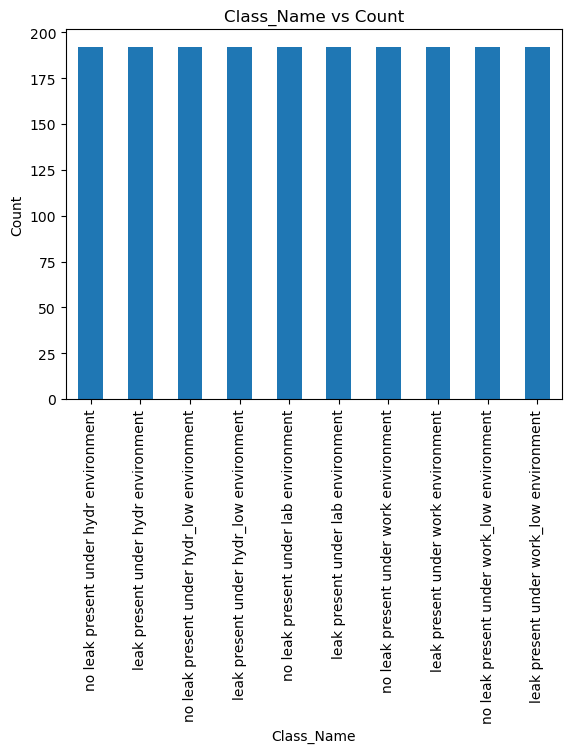

In [86]:
import matplotlib.pyplot as plt
Count.plot(kind="bar")
plt.xlabel("Class_Name")
plt.ylabel("Count")
plt.title("Class_Name vs Count")
plt.show()